In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data=pd.read_sas("payhistory.sas7bdat")
data.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,b'0000019',b'X',b'CO'
1,39.0,1993-12-31,41.32,b'0000020',b'X',b'CO'
2,40.0,1993-12-31,13.10,b'0000020',b'X',b'CO'
3,54091.0,1994-01-01,2.02,b'0000020',b'X',b'CO'
4,104480.0,1994-05-19,0.50,b'0000020',b'D',b'OK'


In [5]:
data.iloc[:,3]=data.iloc[:,3].str.decode("utf-8")

In [6]:
data.iloc[:,4]=data.iloc[:,4].str.decode("utf-8")
data.iloc[:,5]=data.iloc[:,5].str.decode("utf-8")

In [7]:
data.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


In [8]:
'''
pid-Unique identifier for each payment.
pdate-Date of payment
pamt-Amount of payment
Extrelno-Unique identifier of each donor
Paytypecd- Paytype
O Bank transfer
D Permanent order
E Own initiative
X Unkonown

Status
Status of payment
OK   Normal/Real payment
CO   Correction (internal)
RF    RF (Refund)
RC    Recall
'''

'\npid-Unique identifier for each payment.\npdate-Date of payment\npamt-Amount of payment\nExtrelno-Unique identifier of each donor\nPaytypecd- Paytype\nO Bank transfer\nD Permanent order\nE Own initiative\nX Unkonown\n\nStatus\nStatus of payment\nOK   Normal/Real payment\nCO   Correction (internal)\nRF    RF (Refund)\nRC    Recall\n'

In [9]:
data.dtypes

PID                 float64
PDATE        datetime64[ns]
PAMT                float64
EXTRELNO             object
PAYTYPECD            object
STATUS               object
dtype: object

In [10]:
data1=pd.read_sas("comclas.sas7bdat")
data1.head()

,CLASCODE,CLASDESC
0,b'CT',b'CTS-item'
1,b'RI',b'Request for information'
2,b'CM',b'Complaint'
3,b'TA',b'Threath / Accusation'
4,b'AK',b'Acknowledgement'


In [11]:
for col in data1.columns:
    data1[col]=data1[col].str.decode("utf-8")

In [12]:
data1.head()

,CLASCODE,CLASDESC
0,CT,CTS-item
1,RI,Request for information
2,CM,Complaint
3,TA,Threath / Accusation
4,AK,Acknowledgement


In [13]:
data1['CLASDESC'].value_counts()

Threath / Accusation       1
Answer                     1
Request for information    1
Complaint                  1
CTS-item                   1
Information delivery       1
Acknowledgement            1
Reminder                   1
Name: CLASDESC, dtype: int64

In [14]:
'''
Comclas-Description of the contact class.
Clascode- Code of contact class
Clasdesc- Description

'''

'\nComclas-Description of the contact class.\nClascode- Code of contact class\nClasdesc- Description\n\n'

In [15]:
data1.dtypes

CLASCODE    object
CLASDESC    object
dtype: object

In [16]:
data2=pd.read_sas("commaint.sas7bdat")
data2.head()

,MNTOPCODE,MNTOPDESC
0,b'CAN',b'Cancellations/replacements'
1,b'DIS',b'Discontinuations'
2,b'MKT',b'Marketing - Enquiries'
3,b'GEN',b'General'
4,b'NEW',b'New relations'


In [17]:
for col in data2.columns:
    data2[col]=data2[col].str.decode("utf-8")

In [18]:
data2.head()

,MNTOPCODE,MNTOPDESC
0,CAN,Cancellations/replacements
1,DIS,Discontinuations
2,MKT,Marketing - Enquiries
3,GEN,General
4,NEW,New relations


In [19]:
data2['MNTOPDESC'].value_counts()

General                            2
New relations                      1
Mail met FC, klachten en info      1
Web related Actions: E-commerce    1
Finance                            1
Projects                           1
Enrollment                         1
Correspondence FP/FC               1
Cancellations/replacements         1
Communication Tracking System      1
Action                             1
Merchandising                      1
Reports                            1
Tax forms                          1
Discontinuations                   1
Public Relations activities        1
Volunteers                         1
Translation                        1
Contacts for sponsoring            1
TV-Show                            1
information about Plan             1
Visits                             1
Change in information Relation     1
Catastrophes                       1
Special Forms                      1
Fiscal certificates                1
Information about FF/FC            1
M

In [20]:
'''
Commaint-Description of the main topic code.
Mntopcode- Main topic code
Mntopdesc- Description

'''

'\nCommaint-Description of the main topic code.\nMntopcode- Main topic code\nMntopdesc- Description\n\n'

In [21]:
data3=pd.read_sas("commediu.sas7bdat")
data3.head()

,MEDIUMCODE,MEDIUMDESC
0,b'FF',b'Face to Face contact'
1,b'FX',b'Fax'
2,b'TX',b'Telex'
3,b'EM',b'Electronic Mail'
4,b'TE',b'Telephone call'


In [22]:
for col in data3.columns:
    data3[col]=data3[col].str.decode("utf-8")

In [23]:
data3.head()

,MEDIUMCODE,MEDIUMDESC
0,FF,Face to Face contact
1,FX,Fax
2,TX,Telex
3,EM,Electronic Mail
4,TE,Telephone call


In [24]:
'''
Commediu: Description of medium type.
Mediumcode- Code of the mediumtype
Mediumdesc- Description

'''

'\nCommediu: Description of medium type.\nMediumcode- Code of the mediumtype\nMediumdesc- Description\n\n'

In [25]:
data4=pd.read_sas("communication.sas7bdat")
data4.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,b'000405402',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-05-09
1,b'000430904',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-06-14
2,b'000592732',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
3,b'000593375',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
4,b'000618514',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-11-28


In [26]:
for col in data4.columns:
    if col != 'CONTDATE':
        data4[col]=data4[col].str.decode("utf-8")

In [27]:
data4.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28


In [28]:
'''
Communication:    All    possible communication    between    the    donor    and    the 
organization
Contid-Unique identifier for each contact
Mediumcode-Medium of the contact (CI is unknown)
Mntopcode-Main topic code of the contact
Classcode-Class of the contact
Extrelno-Unique identifier for each donor
Contdirec-Direction of the communication
I-Incoming
P-Outgoing
Contdate-Date of the contact

'''

'\nCommunication:    All    possible communication    between    the    donor    and    the \norganization\nContid-Unique identifier for each contact\nMediumcode-Medium of the contact (CI is unknown)\nMntopcode-Main topic code of the contact\nClasscode-Class of the contact\nExtrelno-Unique identifier for each donor\nContdirec-Direction of the communication\nI-Incoming\nP-Outgoing\nContdate-Date of the contact\n\n'

In [29]:
data5=pd.read_sas("extrel.sas7bdat")
data5.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,b'0026414',b'CT',1995-02-02,NaT
1,b'0026419',b'FP',1992-03-01,NaT
2,b'0026424',b'FP',1992-03-01,1996-12-24
3,b'0026430',b'FP',1992-03-01,2006-01-31
4,b'0026430',b'CT',1997-03-07,NaT


In [30]:
data5['EXTRELNO']=data5.iloc[:,0].str.decode("utf-8")
data5['EXRELACTCD']=data5.iloc[:,1].str.decode("utf-8")

In [31]:
data5.head()


,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,0026414,CT,1995-02-02,NaT
1,0026419,FP,1992-03-01,NaT
2,0026424,FP,1992-03-01,1996-12-24
3,0026430,FP,1992-03-01,2006-01-31
4,0026430,CT,1997-03-07,NaT


In [32]:
data5.dtypes

EXTRELNO              object
EXRELACTCD            object
EXTRELSTDT    datetime64[ns]
EXRELDATEN    datetime64[ns]
dtype: object

In [33]:
'''
Extrel: All the donors of the organization.
Extrelno-Unique identifier of each donor
Exrelactcd-Activity code of the donor
Extrelstdt-Start date of the relationship
Exreldaten-End date of the relationship (Missing: not ended
'''

'\nExtrel: All the donors of the organization.\nExtrelno-Unique identifier of each donor\nExrelactcd-Activity code of the donor\nExtrelstdt-Start date of the relationship\nExreldaten-End date of the relationship (Missing: not ended\n'

In [34]:
data6=pd.read_sas("extrelty.sas7bdat")
data6.head()

,EXRELACTCD,EXRELACTDE
0,b'FP',b'CommitmentDo'
1,b'PS',b'Prospect'
2,b'PF',b'Prosp Fundra'
3,b'PP',b'Prosp Promot'
4,b'GR',b'Grantor'


In [35]:
for col in data6.columns:
    data6[col]=data6[col].str.decode("utf-8")

In [36]:
data6.head()

,EXRELACTCD,EXRELACTDE
0,FP,CommitmentDo
1,PS,Prospect
2,PF,Prosp Fundra
3,PP,Prosp Promot
4,GR,Grantor


In [37]:
'''
Extrelty: Description of the activity
Exrelactcd-Activity code of the donor
Exrelactde-Description of the activity
'''

'\nExtrelty: Description of the activity\nExrelactcd-Activity code of the donor\nExrelactde-Description of the activity\n'

In [38]:
data7=pd.read_sas("nameaddr.sas7bdat")
data7.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,b'0000019',b'HR',b'2500',b'NL'
1,b'0000020',b'HR',b'9550',b'NL'
2,b'0000035',b'HM',b'2150',b'NL'
3,b'0000042',b'FA',b'3012',b'NL'
4,b'0000043',b'MW',b'3000',b'NL'


In [39]:
'''
Nameaddr: Sociodemographical information
Extrelno-Unique identifier of each donor
Name1title-Title to address someone
Postcode-Postcode
Languagecode-Preferred mailing language
'''

'\nNameaddr: Sociodemographical information\nExtrelno-Unique identifier of each donor\nName1title-Title to address someone\nPostcode-Postcode\nLanguagecode-Preferred mailing language\n'

In [40]:
data7['NAME1TITLE']=data7.iloc[:,1].str.decode("utf-8")

In [41]:
data7['EXTRELNO']=data7.iloc[:,0].str.decode("utf-8")
data7['POSTCODE']=data7.iloc[:,2].str.decode("utf-8")
data7['LANGUACODE']=data7.iloc[:,3].str.decode("utf-8")

In [42]:
data7.dtypes

EXTRELNO      object
NAME1TITLE    object
POSTCODE      object
LANGUACODE    object
dtype: object

In [43]:
data7.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,0000019,HR,2500,NL
1,0000020,HR,9550,NL
2,0000035,HM,2150,NL
3,0000042,FA,3012,NL
4,0000043,MW,3000,NL


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205720 entries, 0 to 1205719
Data columns (total 6 columns):
PID          1205720 non-null float64
PDATE        1205720 non-null datetime64[ns]
PAMT         1205720 non-null float64
EXTRELNO     1205720 non-null object
PAYTYPECD    1187546 non-null object
STATUS       1205719 non-null object
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 55.2+ MB


In [45]:
data.describe()

,PID,PAMT
count,1.205720e+06,1.205720e+06
mean,2.655267e+06,2.579925e+01
std,1.480799e+06,3.725114e+01
min,3.800000e+01,-2.436960e+03
25%,1.377468e+06,2.033000e+01
50%,2.709602e+06,2.033000e+01
75%,3.946880e+06,2.300000e+01
max,5.101978e+06,2.436960e+03


In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
CLASCODE    8 non-null object
CLASDESC    8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


In [47]:
data1.describe()

,CLASCODE,CLASDESC
count,8,8
unique,8,8
top,TA,Threath / Accusation
freq,1,1


In [48]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
MNTOPCODE    30 non-null object
MNTOPDESC    30 non-null object
dtypes: object(2)
memory usage: 560.0+ bytes


In [49]:
data2.describe()

,MNTOPCODE,MNTOPDESC
count,30,30
unique,30,29
top,FIN,General
freq,1,2


In [50]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
MEDIUMCODE    16 non-null object
MEDIUMDESC    16 non-null object
dtypes: object(2)
memory usage: 336.0+ bytes


In [51]:
data3.describe()

,MEDIUMCODE,MEDIUMDESC
count,16,16
unique,16,16
top,NA,Letters
freq,1,1


In [52]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763569 entries, 0 to 763568
Data columns (total 7 columns):
CONTID        763569 non-null object
MEDIUMCODE    763569 non-null object
MNTOPCODE     763569 non-null object
CLASCODE      763569 non-null object
EXTRELNO      763569 non-null object
CONTDIREC     763569 non-null object
CONTDATE      763569 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 40.8+ MB


In [53]:
data4.describe()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
count,763569,763569,763569,763569,763569,763569,763569
unique,763328,15,24,9,21932,2,3290
top,005059933,CI,CTS,CT,0181194,O,2001-11-20 00:00:00
freq,2,446595,453839,459032,1008,733423,10760
first,NaN,NaN,NaN,NaN,NaN,NaN,1993-11-02 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-25 00:00:00


In [54]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26689 entries, 0 to 26688
Data columns (total 4 columns):
EXTRELNO      26689 non-null object
EXRELACTCD    26689 non-null object
EXTRELSTDT    26689 non-null datetime64[ns]
EXRELDATEN    10168 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 834.1+ KB


In [55]:
data5.describe()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
count,26689,26689,26689,10168
unique,18704,17,2877,2567
top,0038595,FP,1994-11-29 00:00:00,1994-12-07 00:00:00
freq,6,11442,1039,58
first,NaN,NaN,1989-11-01 00:00:00,1927-10-31 00:00:00
last,NaN,NaN,2007-02-01 00:00:00,2007-01-25 00:00:00


In [56]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
EXRELACTCD    26 non-null object
EXRELACTDE    26 non-null object
dtypes: object(2)
memory usage: 496.0+ bytes


In [57]:
data6.describe()

,EXRELACTCD,EXRELACTDE
count,26,26
unique,26,26
top,JS,Contributor
freq,1,1


In [58]:
data4.columns


Index(['CONTID', 'MEDIUMCODE', 'MNTOPCODE', 'CLASCODE', 'EXTRELNO',
       'CONTDIREC', 'CONTDATE'],
      dtype='object')

In [59]:
len(data4)

763569

In [60]:
#Splitting data into timewindow defined.


In [61]:
data.sort_values('PDATE',inplace=True)

In [62]:
data4.sort_values('CONTDATE',inplace=True)

In [63]:
data5.sort_values('EXRELDATEN',inplace=True)

In [64]:
import datetime
new_data=data[data.PDATE<=pd.Timestamp(2005,12,3)]

In [65]:
new_data4=data4[data4.CONTDATE<=pd.Timestamp(2005,12,3)]

In [66]:
new_data5=data5[data5.EXRELDATEN<=pd.Timestamp(2005,12,3)]

In [67]:
donors=(new_data4['EXTRELNO'].unique())

In [68]:
ind_data=(new_data4['EXTRELNO'].value_counts()).to_frame()

In [69]:
ind_data.index.names = ['EXTRELNO']
ind_data.rename(index={None:'EXTRELNO'},columns={'EXTRELNO':'Frequency'},inplace=True)

In [70]:
new_data4['recency']=pd.Timestamp(2005,12,3)-new_data4['CONTDATE']

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
ind_data['recency']=new_data4.groupby('EXTRELNO').recency.min()

In [72]:
ind_data.head()

,Frequency,recency
EXTRELNO,,
0181194,760,11 days
0001773,545,10 days
0025455,476,10 days
0035750,435,12 days
0035231,373,40 days


In [73]:
ind_data['sum']=new_data.groupby('EXTRELNO').PAMT.sum()

In [74]:
ind_data.head()

,Frequency,recency,sum
EXTRELNO,,,
0181194,760,11 days,7412.56
0001773,545,10 days,52168.79
0025455,476,10 days,28243.57
0035750,435,12 days,14648.45
0035231,373,40 days,27620.49


In [75]:
ind_data['avg']=new_data.groupby('EXTRELNO').PAMT.mean()

In [76]:
ind_data.head()

,Frequency,recency,sum,avg
EXTRELNO,,,,
0181194,760,11 days,7412.56,23.020373
0001773,545,10 days,52168.79,20.259724
0025455,476,10 days,28243.57,110.759098
0035750,435,12 days,14648.45,57.899012
0035231,373,40 days,27620.49,20.160942


In [77]:
temp=new_data
temp.index=new_data.EXTRELNO
temp1=temp['PAYTYPECD'].to_frame()

In [78]:
temp2=pd.DataFrame()

In [79]:
curr_val=pd.get_dummies(temp1['PAYTYPECD'],prefix='PAYTYPECD')

In [80]:
curr_val.loc['0000020'].sum()

PAYTYPECD_D    139
PAYTYPECD_E      0
PAYTYPECD_O      0
PAYTYPECD_X      3
dtype: int64

In [81]:
pay_type=curr_val.groupby('EXTRELNO').sum()

In [82]:
len(pay_type)

15900

In [83]:
ind_data=ind_data.join(pay_type)

In [84]:
data7.index=data7['EXTRELNO']

In [85]:
ind_data.join(data7['LANGUACODE'])

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,LANGUACODE
EXTRELNO,,,,,,,,,
0181194,760,11 days,7412.56,23.020373,322.0,0.0,0.0,0.0,NL
0001773,545,10 days,52168.79,20.259724,2463.0,42.0,15.0,25.0,NL
0025455,476,10 days,28243.57,110.759098,0.0,10.0,214.0,10.0,NL
0035750,435,12 days,14648.45,57.899012,232.0,10.0,0.0,4.0,NL
0035231,373,40 days,27620.49,20.160942,1332.0,0.0,0.0,28.0,NL
0000955,312,162 days,5687.19,15.005778,0.0,7.0,361.0,9.0,NL
0009970,308,54 days,2811.97,19.943050,138.0,0.0,1.0,2.0,NL
0033799,296,59 days,4157.86,50.705610,45.0,0.0,24.0,4.0,NL
0174473,296,16 days,5606.39,14.910612,0.0,7.0,366.0,0.0,NL


In [86]:
complaint_data=new_data4[new_data4.CLASCODE=='CM']

In [87]:
complaint_data.index=complaint_data['EXTRELNO']

In [88]:
temp=ind_data
temp=temp.join(complaint_data['CLASCODE'])

In [89]:
curr_val1=pd.get_dummies(temp['CLASCODE'],prefix='CLASCODE')

In [90]:
#groupby index
curr_val1=curr_val1.groupby(curr_val1.index).sum()

In [91]:
ind_data=ind_data.join(curr_val1)

In [92]:
# ind_data.drop('CLASCODE',axis=1,inplace=True)

In [93]:
# #duplicate data present
# ind_data[ind_data.index.value_counts()>1]
# # uni_index=ind_data.index.drop_duplicates(keep='first')
# # temp=ind_data
# # ind_data=pd.DataFrame(index=uni_index)
# # ind_data.join(temp)
# # len(ind_data)
# temp['EXTRELNO']=temp.index
# ind_data=temp.drop_duplicates(subset='EXTRELNO')

In [94]:
ind_data

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
EXTRELNO,,,,,,,,,
0181194,760,11 days,7412.56,23.020373,322.0,0.0,0.0,0.0,0
0001773,545,10 days,52168.79,20.259724,2463.0,42.0,15.0,25.0,0
0025455,476,10 days,28243.57,110.759098,0.0,10.0,214.0,10.0,0
0035750,435,12 days,14648.45,57.899012,232.0,10.0,0.0,4.0,0
0035231,373,40 days,27620.49,20.160942,1332.0,0.0,0.0,28.0,1
0000955,312,162 days,5687.19,15.005778,0.0,7.0,361.0,9.0,0
0009970,308,54 days,2811.97,19.943050,138.0,0.0,1.0,2.0,2
0033799,296,59 days,4157.86,50.705610,45.0,0.0,24.0,4.0,0
0174473,296,16 days,5606.39,14.910612,0.0,7.0,366.0,0.0,0


In [95]:
inco_com_data=new_data4[new_data4.CONTDIREC=='I']

In [96]:
inco_com_data.index=inco_com_data['EXTRELNO']

In [97]:
temp=ind_data
temp=temp.join(inco_com_data['CONTDIREC'])
curr_val2=pd.get_dummies(temp['CONTDIREC'],prefix='CONTDIREC')

In [98]:
curr_val2.index.unique()

Index(['0000020', '0000035', '0000042', '0000043', '0000060', '0000072',
       '0000081', '0000089', '0000091', '0000100',
       ...
       '0240664', '0240678', '0240679', '0240684', '0240685', '0240689',
       '0240696', '0240698', '0240700', '0240752'],
      dtype='object', name='EXTRELNO', length=21306)

In [99]:
len(ind_data)

21306

In [100]:
ind_data.columns

Index(['Frequency', 'recency', 'sum', 'avg', 'PAYTYPECD_D', 'PAYTYPECD_E',
       'PAYTYPECD_O', 'PAYTYPECD_X', 'CLASCODE_CM'],
      dtype='object')

In [101]:
total = ind_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((ind_data.isnull().sum(axis=0)/ind_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
PAYTYPECD_X,6393,30.005632
PAYTYPECD_O,6393,30.005632
PAYTYPECD_E,6393,30.005632
PAYTYPECD_D,6393,30.005632
avg,6393,30.005632
sum,6393,30.005632
CLASCODE_CM,0,0.000000
recency,0,0.000000
Frequency,0,0.000000


In [102]:
ind_data.head(20)

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
EXTRELNO,,,,,,,,,
0181194,760,11 days,7412.56,23.020373,322.0,0.0,0.0,0.0,0
0001773,545,10 days,52168.79,20.259724,2463.0,42.0,15.0,25.0,0
0025455,476,10 days,28243.57,110.759098,0.0,10.0,214.0,10.0,0
0035750,435,12 days,14648.45,57.899012,232.0,10.0,0.0,4.0,0
0035231,373,40 days,27620.49,20.160942,1332.0,0.0,0.0,28.0,1
0000955,312,162 days,5687.19,15.005778,0.0,7.0,361.0,9.0,0
0009970,308,54 days,2811.97,19.943050,138.0,0.0,1.0,2.0,2
0033799,296,59 days,4157.86,50.705610,45.0,0.0,24.0,4.0,0
0174473,296,16 days,5606.39,14.910612,0.0,7.0,366.0,0.0,0


In [103]:
ind_data['PAYTYPECD_X'].fillna(value=1,inplace=True)

In [104]:
total = ind_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((ind_data.isnull().sum(axis=0)/ind_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
PAYTYPECD_O,6393,30.005632
PAYTYPECD_E,6393,30.005632
PAYTYPECD_D,6393,30.005632
avg,6393,30.005632
sum,6393,30.005632
CLASCODE_CM,0,0.000000
PAYTYPECD_X,0,0.000000
recency,0,0.000000
Frequency,0,0.000000


In [105]:
ind_data['PAYTYPECD_O'].fillna(value=0,inplace=True)
ind_data['PAYTYPECD_D'].fillna(value=0,inplace=True)
ind_data['PAYTYPECD_E'].fillna(value=0,inplace=True)

In [106]:
total = ind_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((ind_data.isnull().sum(axis=0)/ind_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
avg,6393,30.005632
sum,6393,30.005632
CLASCODE_CM,0,0.000000
PAYTYPECD_X,0,0.000000
PAYTYPECD_O,0,0.000000
PAYTYPECD_E,0,0.000000
PAYTYPECD_D,0,0.000000
recency,0,0.000000
Frequency,0,0.000000


In [107]:
from sklearn.preprocessing import Imputer
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(ind_data[['avg']])
ind_data['avg'] = imp_mean.transform(ind_data[['avg']])

In [108]:
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(ind_data[['sum']])
ind_data['sum'] = imp_mean.transform(ind_data[['sum']])

In [109]:
total = ind_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((ind_data.isnull().sum(axis=0)/ind_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
CLASCODE_CM,0,0.0
PAYTYPECD_X,0,0.0
PAYTYPECD_O,0,0.0
PAYTYPECD_E,0,0.0
PAYTYPECD_D,0,0.0
avg,0,0.0
sum,0,0.0
recency,0,0.0
Frequency,0,0.0


In [110]:
new_data5.index=new_data5['EXTRELNO']
ind_data.drop(new_data5.index,errors='ignore',inplace=True)

In [145]:
#Extracting our dependent variable.


In [112]:
dep_data=data5[((data5['EXRELDATEN']>=pd.Timestamp(2006,1,1)) & (data5['EXRELDATEN']<=pd.Timestamp(2006,12,31))) | (data5['EXRELDATEN'].isnull()==True)]

In [113]:
dep_data.index=dep_data['EXTRELNO']

In [114]:
dep_data=dep_data[dep_data['EXTRELSTDT']<pd.Timestamp(2006,1,1)]

In [115]:
temp3=dep_data[dep_data['EXRELDATEN'].isnull()==False]

In [116]:
new_dep_data=pd.DataFrame(index=ind_data.index)

In [117]:
temp3['EXRELDATEN']=1

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
new_dep_data=new_dep_data.join(temp3['EXRELDATEN'])
new_dep_data.fillna(value=0,inplace=True)

In [119]:
new_dep_data['EXTRELNO']=new_dep_data.index

In [120]:
new_dep_data.drop_duplicates(subset='EXTRELNO',inplace=True)

In [121]:
new_dep_data.head()

,EXRELDATEN,EXTRELNO
EXTRELNO,,
0000020,0.0,0000020
0000035,0.0,0000035
0000042,0.0,0000042
0000043,0.0,0000043
0000060,0.0,0000060


In [122]:
len(new_dep_data)

13843

In [123]:
new_dep_data.drop('EXTRELNO',axis=1,inplace=True)

In [82]:
ind_data

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
EXTRELNO,,,,,,,,,
0181194,760,11 days,7412.560000,23.020373,322.0,0.0,0.0,0.0,0
0001773,545,10 days,52168.790000,20.259724,2463.0,42.0,15.0,25.0,0
0025455,476,10 days,28243.570000,110.759098,0.0,10.0,214.0,10.0,0
0035750,435,12 days,14648.450000,57.899012,232.0,10.0,0.0,4.0,0
0035231,373,40 days,27620.490000,20.160942,1332.0,0.0,0.0,28.0,1
0000955,312,162 days,5687.190000,15.005778,0.0,7.0,361.0,9.0,0
0009970,308,54 days,2811.970000,19.943050,138.0,0.0,1.0,2.0,2
0033799,296,59 days,4157.860000,50.705610,45.0,0.0,24.0,4.0,0
0174473,296,16 days,5606.390000,14.910612,0.0,7.0,366.0,0.0,0


In [124]:
e=pd.Series(index=ind_data.index)
for num in range(len(ind_data['recency'])):
    e[num]=ind_data['recency'][num].days


In [125]:
ind_data['recency']=e

#### Here ends the data pre-processing phase.

#### Exploratory data analysis

In [91]:
ind_data.describe()

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
count,21306.000000,21306.000000,21306.000000,21306.000000,21306.000000,21306.000000,21306.000000,21306.000000,21306.000000
mean,33.307707,1285.534450,1863.360956,39.434505,36.787712,0.855487,11.908523,1.147846,0.107575
std,33.578255,1450.937458,1099.725227,37.163421,58.138795,3.882479,32.697421,1.312555,0.459964
min,1.000000,1.000000,-276.000000,-138.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,100.000000,1379.775000,20.013856,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,313.000000,1863.360956,29.700202,0.000000,0.000000,0.000000,1.000000,0.000000
75%,54.000000,2489.000000,2691.380000,39.434505,61.000000,0.000000,2.000000,2.000000,0.000000
max,760.000000,4414.000000,52168.790000,600.000000,2463.000000,137.000000,829.000000,28.000000,8.000000


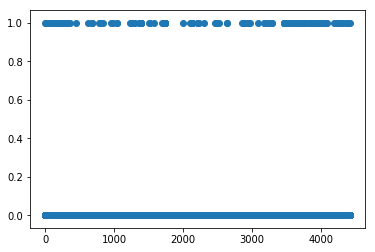

In [150]:
plt.scatter(ind_data['recency'],new_dep_data['EXRELDATEN'])

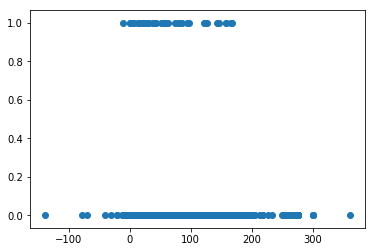

In [151]:
plt.scatter(ind_data['avg'],new_dep_data['EXRELDATEN'])

#### Modelling Phase

In [126]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(ind_data,new_dep_data,test_size=0.2,random_state=0)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [127]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( X_train,y_train) 

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
y_pred=logreg.predict(X_test)

In [130]:
len(y_pred)

2769

In [129]:
from sklearn import metrics

cm = metrics.confusion_matrix( y_test,
                            y_pred , [1,0] )
cm

array([[   0,   45],
       [   0, 2724]], dtype=int64)

Text(0.5,15,'Predicted label')

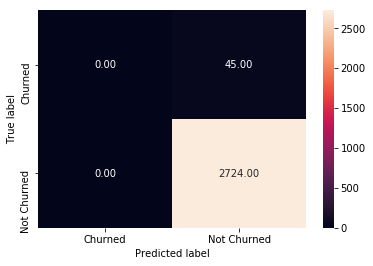

In [131]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Churned", "Not Churned"] , yticklabels = ["Churned", "Not Churned"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [132]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=0)
svm_clf.fit(X_train,y_train)


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [134]:
y_pred=svm_clf.predict(X_test)

In [140]:
len(y_pred)

2769

In [141]:
y_pred=pd.DataFrame(data=y_pred,index=X_test.index)

In [143]:
cm = metrics.confusion_matrix( y_test,
                            y_pred , [1,0] )
cm

array([[   0,   45],
       [   2, 2722]], dtype=int64)

In [144]:
metrics.accuracy_score( y_test, y_pred )

0.9830263633080535